In [14]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [15]:
# Import data
df = pd.read_csv('Position_Salaries.csv')
X = df.iloc[:,1:-1].values
y = df.iloc[:, -1].values

In [16]:
y = y.reshape(len(y),1)

In [17]:
# Feature Scaling 
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

In [18]:
print(y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


In [19]:
# Training the svr on whole dataset 
from sklearn.svm import SVR
reg = SVR()
reg.fit(X, y)

C:\Users\rafe7\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVR()

In [21]:
# Predict a new result 
sc_y.inverse_transform(reg.predict(sc_X.transform([[6.5]])).reshape(-1,1))

array([[170370.0204065]])

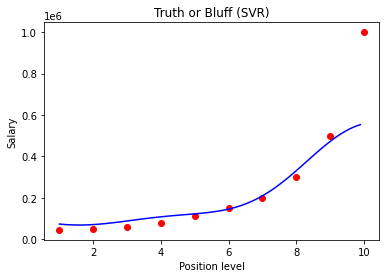

In [23]:
X_grid = np.arange(min(sc_X.inverse_transform(X)), max(sc_X.inverse_transform(X)), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color = 'red')
plt.plot(X_grid, sc_y.inverse_transform(reg.predict(sc_X.transform(X_grid))), color = 'blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()